In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [138]:
constituents_data = pd.read_csv("data\constituents_csv.csv")
financials_data = pd.read_csv("data\constituents-financials_csv.csv")

In [125]:
constituents_data.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [126]:
financials_data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [127]:
financials_data.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000
mean,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179
std,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508
min,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000
50%,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000
75%,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


- The average price of stock is around $103.83
- The price of stocks range from $2.8 to $1806
- There are a total of 505 stock entries from different sectors.

There are 2 missing values in price/earnings and price/books, so the below code will find the missing values and update the values.

In [136]:
missing_pe = financials_data.loc[financials_data["Price/Earnings"].isnull()]
missing_pe["Price/Earnings"] = missing_pe["Price"]/ missing_pe["Earnings/Share"]
financials_data.update(missing_pe)


We can use book value per share for calculate for Price/Book but since we do not have that data, we will first have to calculate book value per share.

In [137]:
missing_pb = financials_data.loc[financials_data["Price/Book"].isnull()]
missing_pb["total_equity"] = missing_pb["Market Cap"] - missing_pb["EBITDA"]
missing_pb["num_outstanding_shares"] = missing_pb["Market Cap"]/ missing_pb["Price"]
missing_pb["book_value_per_share"] = missing_pb["total_equity"]/ missing_pb["num_outstanding_shares"]
missing_pb["Price/Book"] = missing_pb["Price"]/ missing_pb["book_value_per_share"]
financials_data.update(missing_pb)

In [130]:
financials_data.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64

Now since the missing values are filled,lets proceed to see for the data is distributed.

Text(0.5, 1.0, 'Price Distribution')

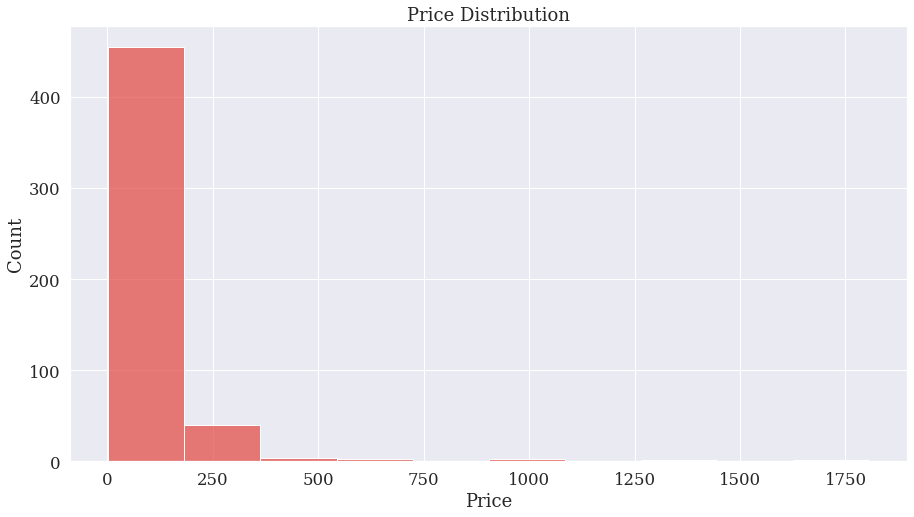

In [131]:
plt.figure(figsize=(15,8))
sns.histplot(financials_data,x="Price",bins=10)
plt.title("Price Distribution")

Text(0.5, 1.0, 'Market Cap Distribution')

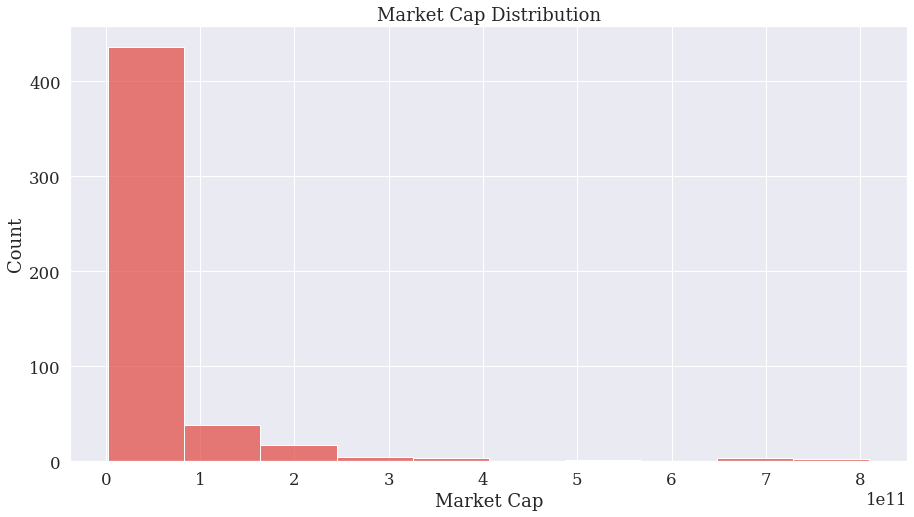

In [132]:
plt.figure(figsize=(15,8))
sns.histplot(financials_data,x="Market Cap",bins=10)
plt.title("Market Cap Distribution")

As per the above data, it seems most of the stocks in the dataset are small cap.

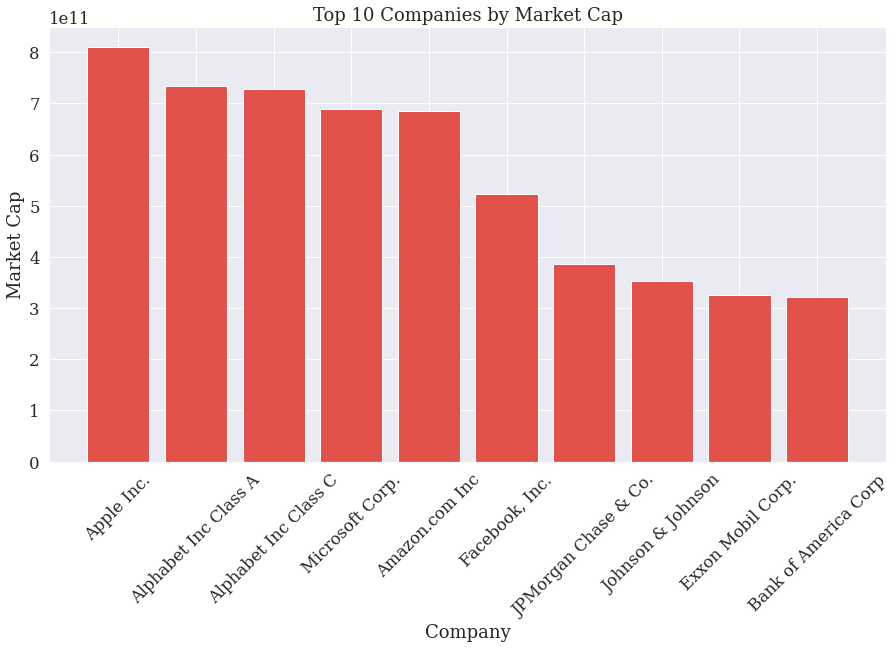

In [133]:
# Create a bar chart of the top 10 companies by Market Cap

plt.figure(figsize=(15, 8))
top_10 = financials_data.sort_values(by='Market Cap', ascending=False).head(10)
plt.bar(top_10['Name'], top_10['Market Cap'])
plt.title('Top 10 Companies by Market Cap')
plt.xlabel('Company')
plt.ylabel('Market Cap')
plt.xticks(rotation=45)
plt.show()

In [134]:
financials_data.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

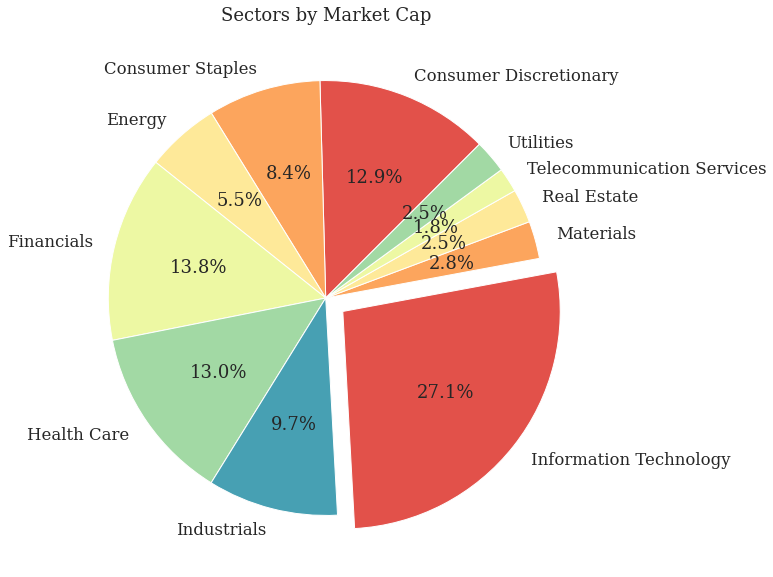

In [135]:
sector_market_cap = financials_data.groupby('Sector')['Market Cap'].sum()

explode = (0, 0, 0, 0,0,0,0.1,0,0,0,0)
sns.set_theme(palette="Spectral", font="serif", font_scale= 1.5)
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor('white')
ax.pie(sector_market_cap, labels=sector_market_cap.index ,startangle=45,explode=explode,autopct='%2.1f%%')
ax.set_title('Sectors by Market Cap')

plt.show()

- As per the above charts, It seems Information Technology sector has the largest market cap with 27.1% of total market shares. Among information technology sector, Companies Apple inc, Alphabet inc and microsoft hold the top 3 positions respectively.
- Healthcare Industry holds the next largest market share with 13%.

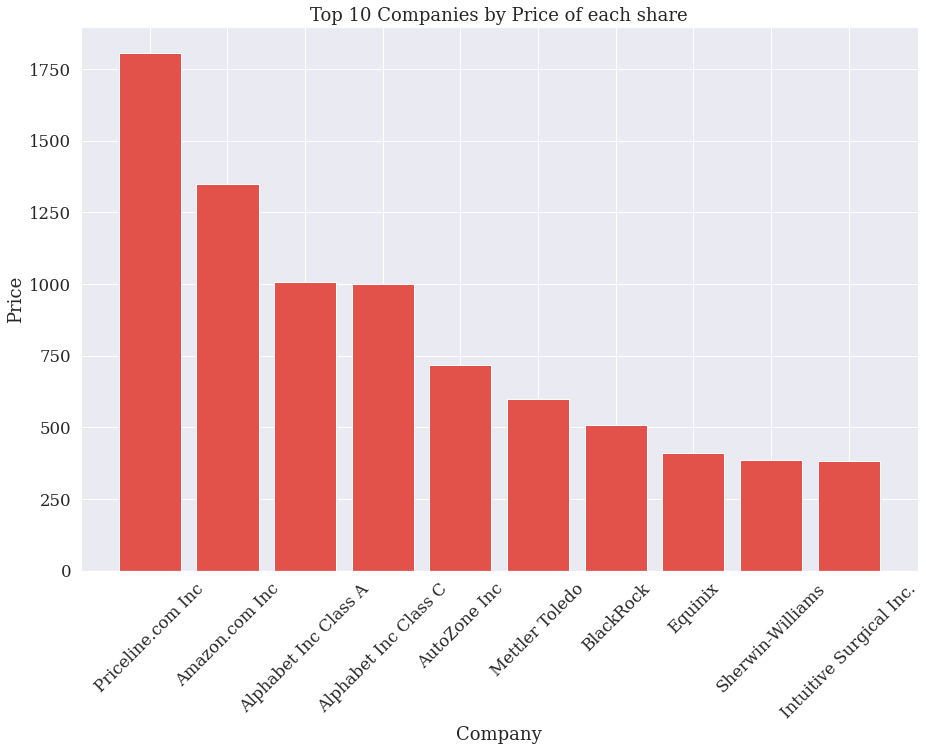

In [140]:
top_10 = financials_data.sort_values(by='Price', ascending=False).head(10)
plt.figure(figsize=(15,10))

plt.bar(top_10["Name"],top_10["Price"])
plt.title('Top 10 Companies by Price of each share')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Priceline.com inc has the highest price per share followed by Amazon.com inc on second position.However The difference between the first and second is quite large compared to the rest of the 10 companies.